# credit_card_fraud_detection

In [152]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,precision_score

In [109]:
DF= pd.read_csv(r'D:\ML_WORK\Kaggle\Credit _card_fraud_detection\creditcardfraud\creditcard.csv')

In [110]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# class imbalance

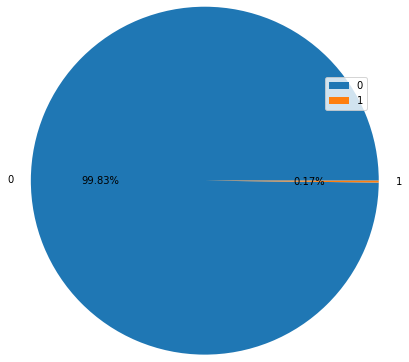

In [134]:
plt.axis('equal')
plt.pie(DF.Class.value_counts(), labels= DF.Class.value_counts().index, autopct='%0.2f%%',radius=2)
plt.legend()
plt.show()

* Here we have problem of class imbalance

## input and output feature

In [136]:
X = DF.iloc[:,1:-1]

y = DF.iloc[:,-1]


##  Standardisation of data

In [113]:
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

## Resampling the data

In [114]:
sm = SMOTE()

x_res, y_res = sm.fit_sample(X_scaled, y)

In [149]:
df_y_res = pd.DataFrame(y_res)

1    284315
0    284315
Name: 0, dtype: int64

## Class balance after resampling

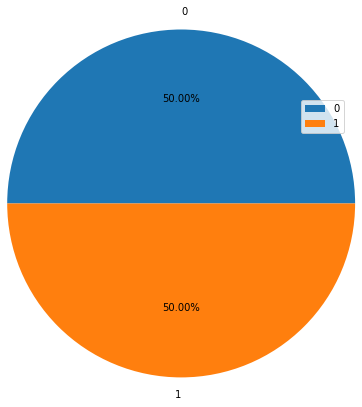

In [150]:
plt.axis('equal')
plt.pie(df_y_res.iloc[:,0].value_counts(), labels= DF.Class.value_counts().index, autopct='%0.2f%%',radius=2)
plt.legend()
plt.show()

* No class imbalance

## Train and test split

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=1/3, random_state=42 )

## Random_forest model

In [118]:
RF = RandomForestClassifier(n_estimators=80, max_features='sqrt',random_state=0)

RF.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## Model accuracy on train data_set

In [119]:
train_yhat = RF.predict(x_train)

In [120]:
confusion_matrix(y_train, train_yhat)

array([[189596,      0],
       [     0, 189490]], dtype=int64)

In [121]:
print(classification_report(y_train, train_yhat))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    189596
          1       1.00      1.00      1.00    189490

avg / total       1.00      1.00      1.00    379086



## Model accuracy on test data_set

In [122]:
test_yhat = RF.predict(x_test)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     94719
          1       1.00      1.00      1.00     94825

avg / total       1.00      1.00      1.00    189544



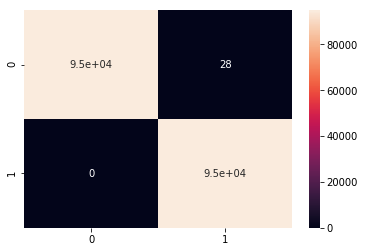

[[94691    28]
 [    0 94825]]


In [123]:
print(classification_report(y_test, test_yhat))

# confusion matrix
sns.heatmap(confusion_matrix(y_test, test_yhat), annot=True)
plt.show()

print(confusion_matrix(y_test, test_yhat))

## Feature importance

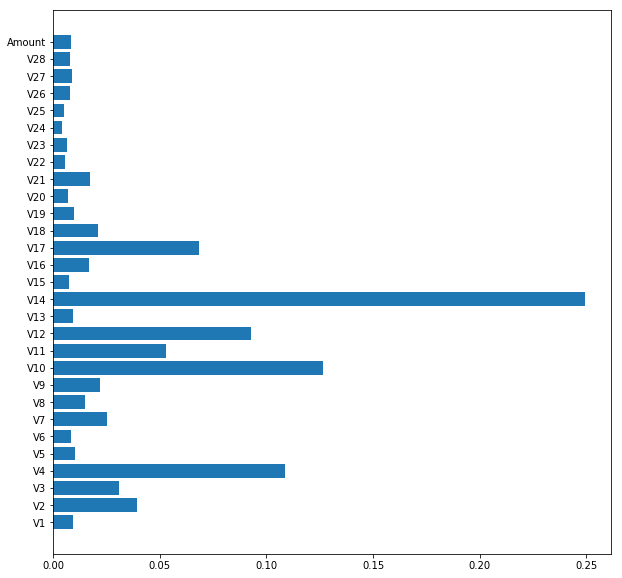

In [159]:
plt.figure(figsize=(10,10))
plt.barh(X.columns, RF.feature_importances_)
plt.show()